# Подключаем необходимые для обработки данных библиотеки

In [619]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np


# Читаем и смотрим датасет

In [620]:
path = '_data.csv'
pd.set_option('display.max_columns', 30)
#pd.set_option()
#pd.set_option('max_info_columns', 30)
rlst = pd.read_csv(path, index_col=0)
with pd.option_context('display.max_colwidth', 25):
    display(rlst)


,ID объявления,Количество комнат,Тип,Метро,Адрес,"Площадь, м2",Дом,Парковка,Цена,Телефоны,Описание,Ремонт,"Площадь комнат, м2",Балкон,Окна,Санузел,Можно с детьми/животными,Дополнительно,Название ЖК,Серия дома,"Высота потолков, м",Лифт,Мусоропровод,Ссылка на объявление
0,271271157,4,Квартира,м. Смоленская (9 мин ...,"Москва, улица Новый А...",200.0/20.0,"5/16, Монолитный",подземная,500000.0 руб./ За мес...,+79166369231,Без комиссии для нани...,Дизайнерский,NaN,NaN,NaN,NaN,"Можно с детьми, Можно...","Мебель в комнатах, Ме...","Новый Арбат, 2010",NaN,3.00,"Пасс (4), Груз (1)",Да,https://www.cian.ru/r...
1,271634126,4,Квартира,м. Смоленская (8 мин ...,"Москва, улица Новый А...",198.0/95.0/18.0,"5/16, Монолитно-кирпи...",подземная,500000.0 руб./ За мес...,+79850608590,Лот 93107. Елена Анис...,Дизайнерский,25 25 20 25,NaN,На улицу и двор,"Совмещенный (2), Разд...",Можно с детьми,"Мебель в комнатах, Ме...",Новый Арбат,NaN,3.50,"Пасс (1), Груз (1)",Нет,https://www.cian.ru/r...
2,271173086,"4, Оба варианта",Квартира,м. Смоленская (7 мин ...,"Москва, улица Новый А...",200.0/116.0/4.0,5/16,подземная,500000.0 руб./ За мес...,"+79672086536, +790992...",ID 36380: Шикарная 4...,Евроремонт,NaN,NaN,На улицу и двор,Совмещенный (3),Можно с детьми,"Мебель в комнатах, Ме...",Новый Арбат,NaN,3.20,Пасс (1),NaN,https://www.cian.ru/r...
3,272197456,"4, Оба варианта",Квартира,м. Смоленская (3 мин ...,"Москва, переулок Плот...",170.0/95.0/17.0,5/6,подземная,400000.0 руб./ За мес...,"+79660342340, +790992...",ID 31618: Эксклюзивн...,Евроремонт,14-42-20-19,NaN,На улицу и двор,Совмещенный (3),Можно с животными,"Мебель в комнатах, Ме...",NaN,NaN,3.20,Пасс (1),NaN,https://www.cian.ru/r...
4,273614615,2,Квартира,м. Арбатская (7 мин п...,"Москва, улица Новый А...",58.0/38.0/5.0,"12/26, Панельный",NaN,225000.0 руб./ За мес...,+79852432860,Лот 111542. Татьяна Л...,Евроремонт,20 18,NaN,На улицу и двор,Совмещенный (2),NaN,"Мебель в комнатах, Ме...",The Book,NaN,3.90,"Пасс (1), Груз (1)",Да,https://www.cian.ru/r...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23363,215565511,NaN,Квартира,м. Говорово (8 мин пе...,"Москва, Боровское шос...",35.0/16.4/8.0,10/14,NaN,42000.0 руб./ За меся...,+79154383401,Сдаётся светлая тепла...,Евроремонт,NaN,Балкон (1),NaN,Совмещенный (1),NaN,"Мебель в комнатах, Ме...",Мещерский лес,NaN,NaN,"Пасс (1), Груз (1)",NaN,https://www.cian.ru/r...
23364,274654844,1,Квартира,м. Солнцево (7 мин пе...,"Москва, Производствен...",38.7/16.5/11.0,"5/18, Монолитный",NaN,45000.0 руб./ За меся...,+79151173402,Сдам однокомнатную кв...,Евроремонт,NaN,Лоджия (1),Во двор,Совмещенный (1),NaN,"Мебель в комнатах, Ме...",Лучи,NaN,NaN,"Пасс (1), Груз (1)",NaN,https://www.cian.ru/r...
23365,268679909,"2, Оба варианта",Квартира,м. Солнцево (6 мин пе...,"Москва, Боровский про...",43.1,"5/5, Кирпичный",NaN,50000.0 руб./ За меся...,+79653825192,Рассматриваются кварт...,Дизайнерский,NaN,Балкон (1),На улицу и двор,Совмещенный (1),Можно с детьми,"Мебель на кухне, Душе...",NaN,NaN,NaN,NaN,NaN,https://www.cian.ru/r...
23366,274807525,2,Квартира,м. Солнцево (11 мин п...,"Москва, улица Богдано...",52.5/10.0,"8/23, Монолитный",наземная,55000.0 руб./ За меся...,+79660611965,Двухкомнатная уютная ...,Евроремонт,NaN,Лоджия (1),Во двор,"Совмещенный (1), Разд...",NaN,"Мебель в комнатах, Ме...",NaN,NaN,2.65,Пасс (3),Да,https://www.cian.ru/r...


В датафрейме мы видим **24 столбца** с данными. Можно сразу обратить внимание на следующее:
- В некоторых столбцах присутсвуют **NaN** *(not a number)* значения
- Часть данных, которую хотелось бы видеть в числовом формате, представлена в виде строк, не состоящих полностью из цифр *(Количество комнат, Расстояние до метро, Цена, Площадь, Площадь комнат)*
- В части столбцов представлены данные, которые стоило бы разделить на отдельные столбцы для удобства обработки *(Количество комнат, Метро, Цена, Площадь, Площадь комнат, Лифт, Санузел)*
- В таблице присутствуют данные, которые очевидно не могут влиять на стоимость квартиры *(ID, Ссылка)*


# Москва?
В качестве пилотного региона выбрана **Москва**, поэтому посмотрим, есть ли у нас квартиры **не в Москве**

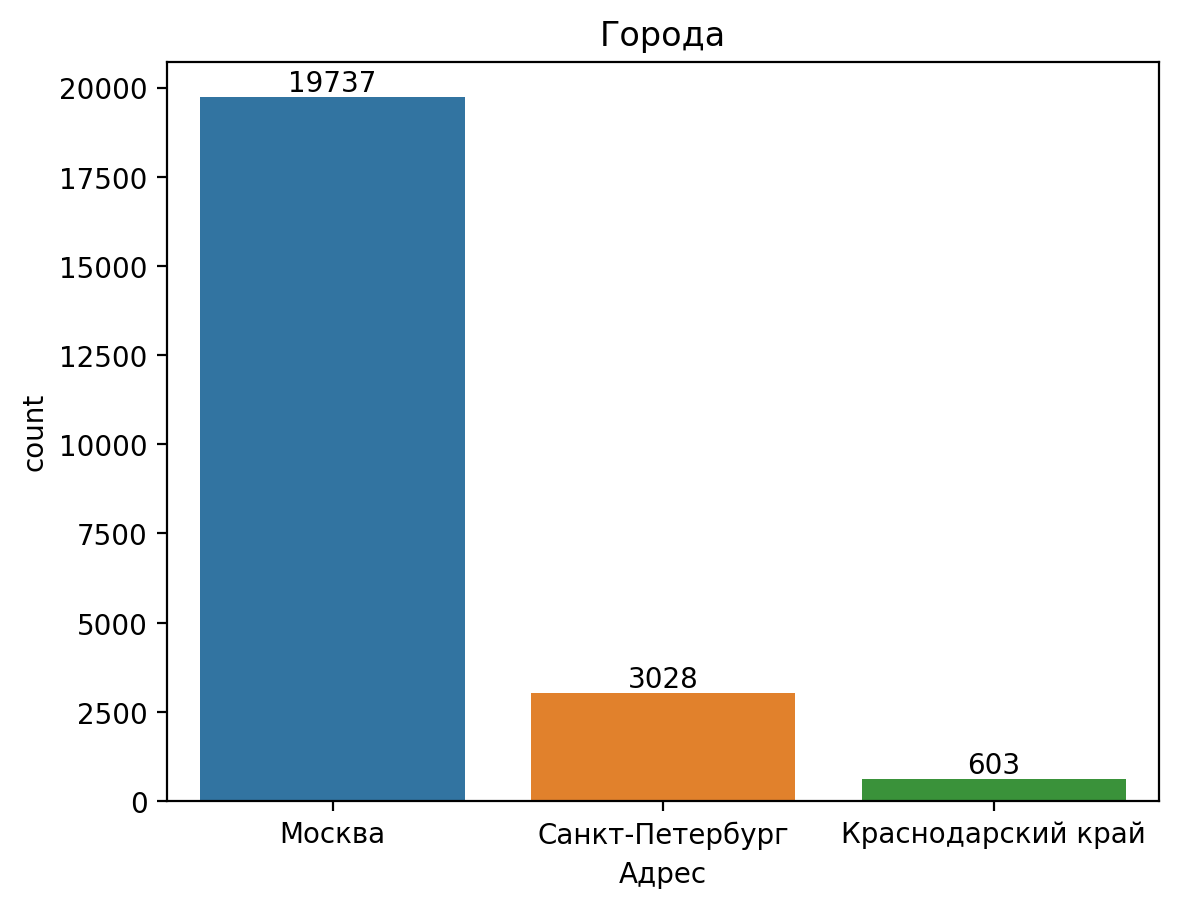

In [621]:
%config InlineBackend.figure_format='retina'
bars=sns.countplot(x=rlst['Адрес'].apply(lambda x: x.split(sep=', ')[0]))#Смотрим квартиры по городам
bars.set(title='Города')
for i in bars.containers:
    bars.bar_label(i)


Видно, что в датасете **3631** квартира не в Москве. Что делать? 👇

## Удаляем всё кроме Москвы

In [622]:
rlst.drop(rlst.loc[rlst['Адрес'].apply(lambda x: x.split(sep=', ')[0])!='Москва'].index,inplace=True)
rlst.reset_index(inplace=True)
print(f"Размер датафрейма только с Москвой стал {rlst.shape}")


Размер датафрейма только с Москвой стал (19737, 25)


# Инфо
Посмотрим общую информацию обо всех столбцах нашего набора данных, чтобы узнать их **тип** и **количество ненулевых значений**

In [623]:
rlst.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19737 entries, 0 to 19736
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   index                     19737 non-null  int64  
 1   ID  объявления            19737 non-null  int64  
 2   Количество комнат         19202 non-null  object 
 3   Тип                       19737 non-null  object 
 4   Метро                     19391 non-null  object 
 5   Адрес                     19737 non-null  object 
 6   Площадь, м2               19737 non-null  object 
 7   Дом                       19737 non-null  object 
 8   Парковка                  8563 non-null   object 
 9   Цена                      19737 non-null  object 
 10  Телефоны                  19737 non-null  object 
 11  Описание                  19737 non-null  object 
 12  Ремонт                    17274 non-null  object 
 13  Площадь комнат, м2        12509 non-null  object 
 14  Балкон

### Здесь мы видим следующее:
- Числовых значений в датасете только 2
- В нескольких строках *(Название ЖК, Серия дома, Парковка)* очень мало ненулевых значений

Что мы с этим делаем?👇

## Смотрим нули подробнее

,Ненулевые,Нулевые
Параметр,,
index,19737,0
ID объявления,19737,0
Количество комнат,19202,535
Тип,19737,0
Метро,19391,346
Адрес,19737,0
"Площадь, м2",19737,0
Дом,19737,0
Парковка,8563,11174


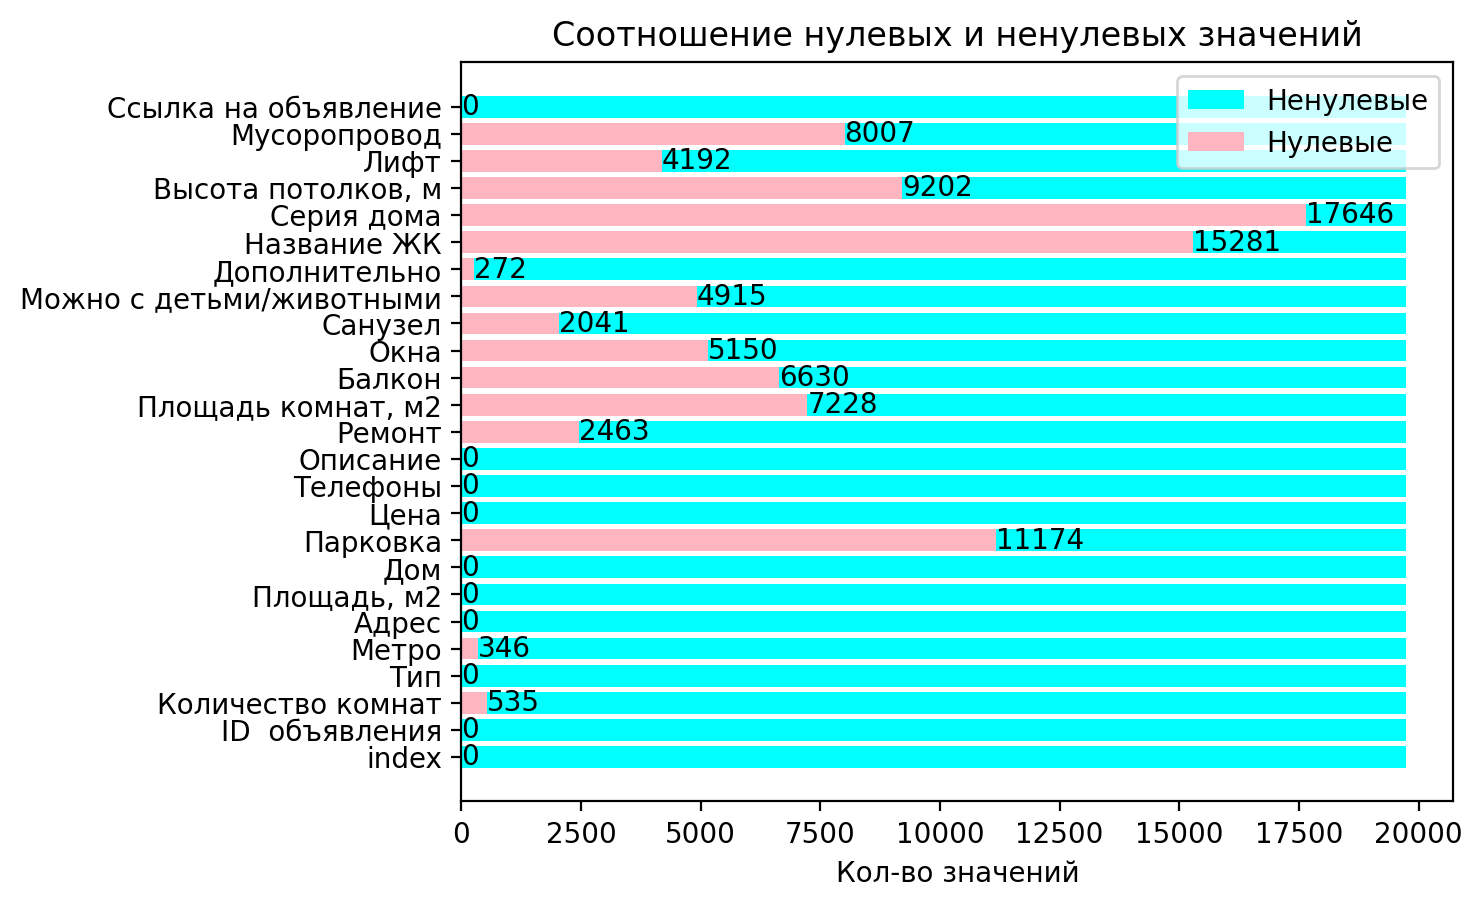

In [624]:
Nulls = pd.concat([rlst.count(), rlst.isnull().sum()], axis = 1).reset_index()
Nulls.rename(columns = {'index':'Параметр', 0:'Ненулевые', 1:'Нулевые'}, inplace = True)
Nulls.set_index('Параметр', inplace = True)
fig,ax= plt.subplots()
ax.barh(y = Nulls.index, width = Nulls['Ненулевые'], left=Nulls['Нулевые'],color='cyan',label='Ненулевые')
ax.barh(y = Nulls.index, width = Nulls['Нулевые'],color='lightpink',label='Нулевые')
ax.bar_label(ax.containers[1],fmt='%.0f')
ax.set(title='Соотношение нулевых и ненулевых значений',xlabel='Кол-во значений')                     
plt.legend()

Nulls


### Что мы видим?
Видим, что у **названий ЖК** и **серии дома** больше половины значений нулевые, так что эти столбцы в дальнейшем можем смело выкинуть, к тому же мы полагаем них маловероятна корелляция с ценой

## Проверим оставшиеся значения на уникальность

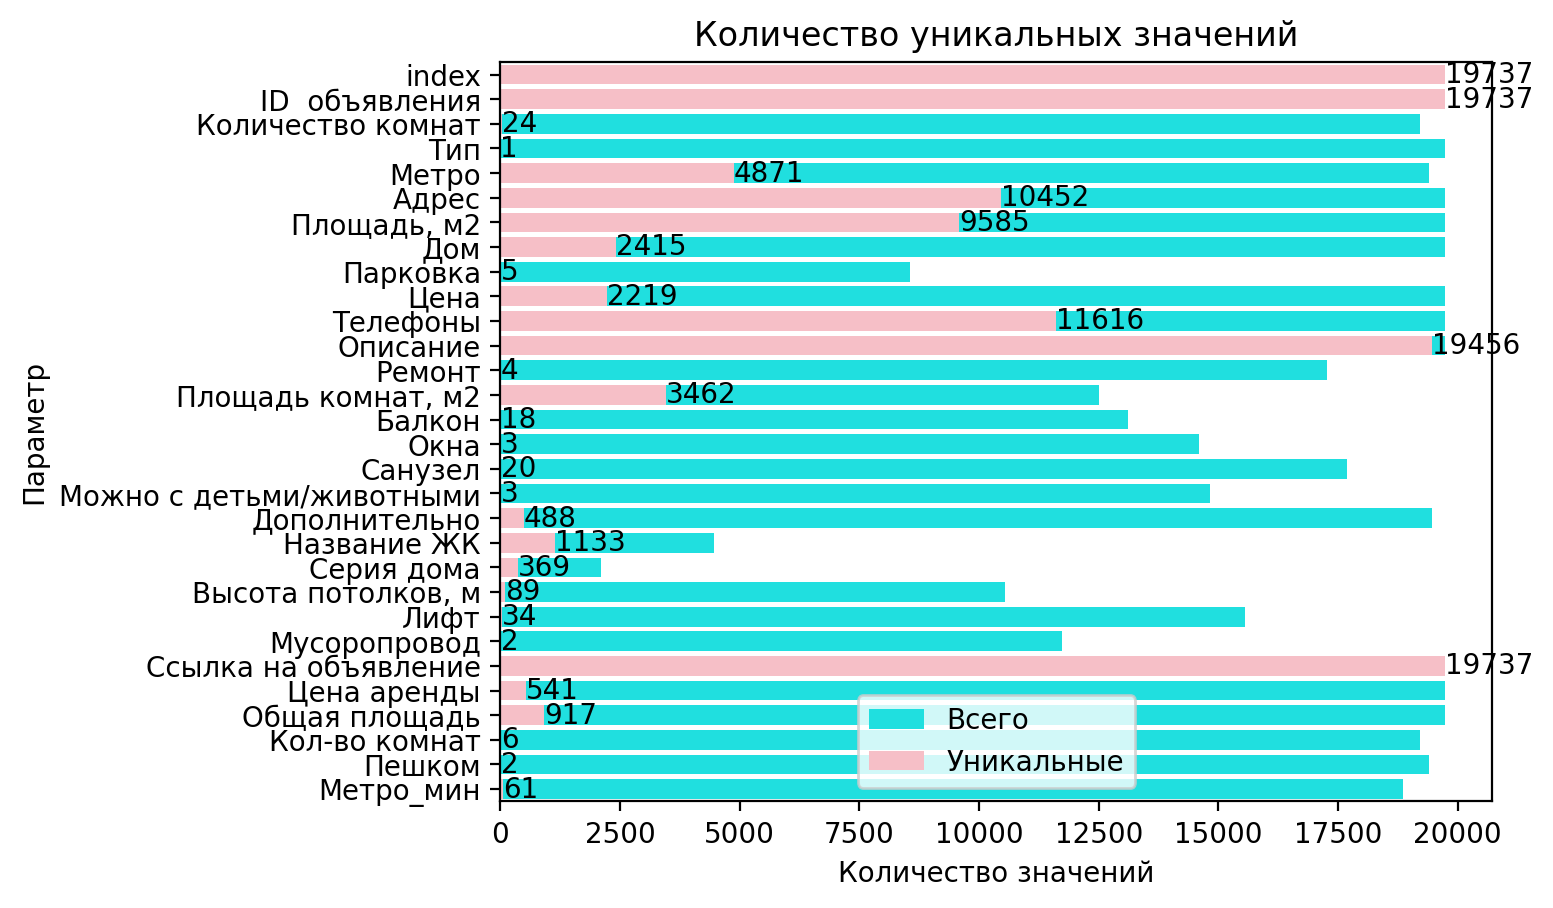

In [625]:
Uniqs = pd.concat([formatted_rlst.nunique(), formatted_rlst.count()], axis = 1).reset_index()
Uniqs.rename(columns = {'index':'Параметр', 0:'Уникальные', 1:'Всего'}, inplace = True)
#pal= {day:'r' }

ax=plt.subplots()
ax=sns.barplot(data=Uniqs,y='Параметр',x='Всего',color='cyan')
ax=sns.barplot(data=Uniqs,y='Параметр',x='Уникальные',color='lightpink')
ax.set(title='Количество уникальных значений')
plt.legend(handles=[ax.containers[0],ax.containers[1]],labels=["Всего","Уникальные"],loc='lower center')
ax.bar_label(ax.containers[1],fmt='%.0f')
#ax.bar_label(ax.containers[0],fmt='%.3f',padding=10)
plt.xlabel('Количество значений');
#plt.show()


### Здесь мы видим:
- У отдельных нечисловых параметров *(Количество комнат, Парковка, Ремонт, Балкон, Окна, Санузел, Можно с детьми/животными, Лифт, Мусоропровод)* крайне низкая уникальность значений, так что мы можем в дальнейшем сделать их категориальными и/или присвоить значениям число
- У некоторых нечисловых параметров *(Описание, Ссылка, Телефоны, ID)* количество уникальных значений того же порядка, что и общее количество значений, так что эти значения категориальными сделать нельзя и от них, крайне вероятно, придётся избавляться
- Тип имеет всего одно уникальное значение, так что от него можно смело избавиться

# Посмотрим полезные метрики для каждого столбца


### Сначала глянем все числовые данные

In [626]:
formatted_rlst = rlst.copy()
formatted_rlst.describe(include=np.number)

,index,ID объявления,"Высота потолков, м"
count,19737.000000,1.973700e+04,10535.000000
mean,11155.834980,2.671149e+08,2.992925
std,6559.873895,1.980106e+07,7.852740
min,0.000000,1.072986e+08,1.200000
25%,5534.000000,2.712212e+08,2.640000
50%,10981.000000,2.739284e+08,2.640000
75%,16731.000000,2.746973e+08,2.800000
max,23367.000000,2.750064e+08,320.000000


#### Что здесь?
- Индекс и ID объявления для нас интереса не предстваляют
- А вот высота потолков нас интересует. Тут мы можем заметить, что максимальная и минимальная высоты неадекватны, поэтому глянем, насколько много таких выбросов


### Потолок

In [627]:
print(f"Топ 5 самых низких потолков:\n{formatted_rlst['Высота потолков, м'].sort_values().head().reset_index()}\n")
print(f"Топ 10 самых высоких потолков:\n{formatted_rlst['Высота потолков, м'].sort_values(ascending=False).head(10).reset_index()}")

Топ 5 самых низких потолков:
   index  Высота потолков, м
0  19034                 1.2
1   9963                 2.0
2  14432                 2.1
3   3526                 2.3
4   7687                 2.3

Топ 10 самых высоких потолков:
   index  Высота потолков, м
0   7969               320.0
1  10076               320.0
2      9               310.0
3  15205               280.0
4   8624               265.0
5   3159               264.0
6  11323               264.0
7    247               260.0
8   8176                28.0
9  18525                28.0


Мы нашли масштабы выброса. Так что в дальнейшем нам нужно будет удалить из значений **1 самый низкий потолок и 8 самых высоких**


### Смотрим нечисловые данные

In [628]:
formatted_rlst.describe(include=object)

,Количество комнат,Тип,Метро,Адрес,"Площадь, м2",Дом,Парковка,Цена,Телефоны,Описание,Ремонт,"Площадь комнат, м2",Балкон,Окна,Санузел,Можно с детьми/животными,Дополнительно,Название ЖК,Серия дома,Лифт,Мусоропровод,Ссылка на объявление
count,19202,19737,19391,19737,19737,19737,8563,19737,19737,19737,17274,12509,13107,14587,17696,14822,19465,4456,2091,15545,11730,19737
unique,24,1,4871,10452,9585,2415,5,2219,11616,19456,4,3462,18,3,20,3,488,1133,369,34,2,19737
top,1,Квартира,м. Водный стадион (5 мин пешком),"Москва, Чапаевский переулок, 3",40.0/20.0/10.0,"3/5, Кирпичный",наземная,"40000.0 руб./ За месяц, Залог - 40000 руб., Ко...",+79652883064,0,Косметический,20,Балкон (1),Во двор,Совмещенный (1),Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Сти...","Символ, 2019",индивидуальный проект,Пасс (1),Да,https://www.cian.ru/rent/flat/271271157
freq,6646,19737,40,63,214,265,5283,1112,253,108,7361,1500,6336,9708,8500,8540,2553,61,615,4865,10262,1


#### Что здесь?
- Видно, что у признака **Тип** всего одно уникальное значение, так что этим признаком мы смело **пренебрегаем**
- У полей **Парковка**, **Ремонт**, **Окна**, **Можно с детьми/животными** достаточно небольшое число уникальных значений, так что эти данные можно назвать категориальными, и при дальнейшей обработке **привести их к типу *категория* или к числу**
- У поля **Мусоропровод** всего 2 уникальных значения, и одно из них *"Да"*. Логично предположить, что другое значение в таком случае — это *"Нет"*. В таком случе этот столбец можно привести к логическому типу данных
- Каждая **Ссылка на объявление** уникальна и так как данные не числовые, ничего полезного мы извлечь отсюда не сможем

# Далее рассмотрим отдельные параметры


## Парковка

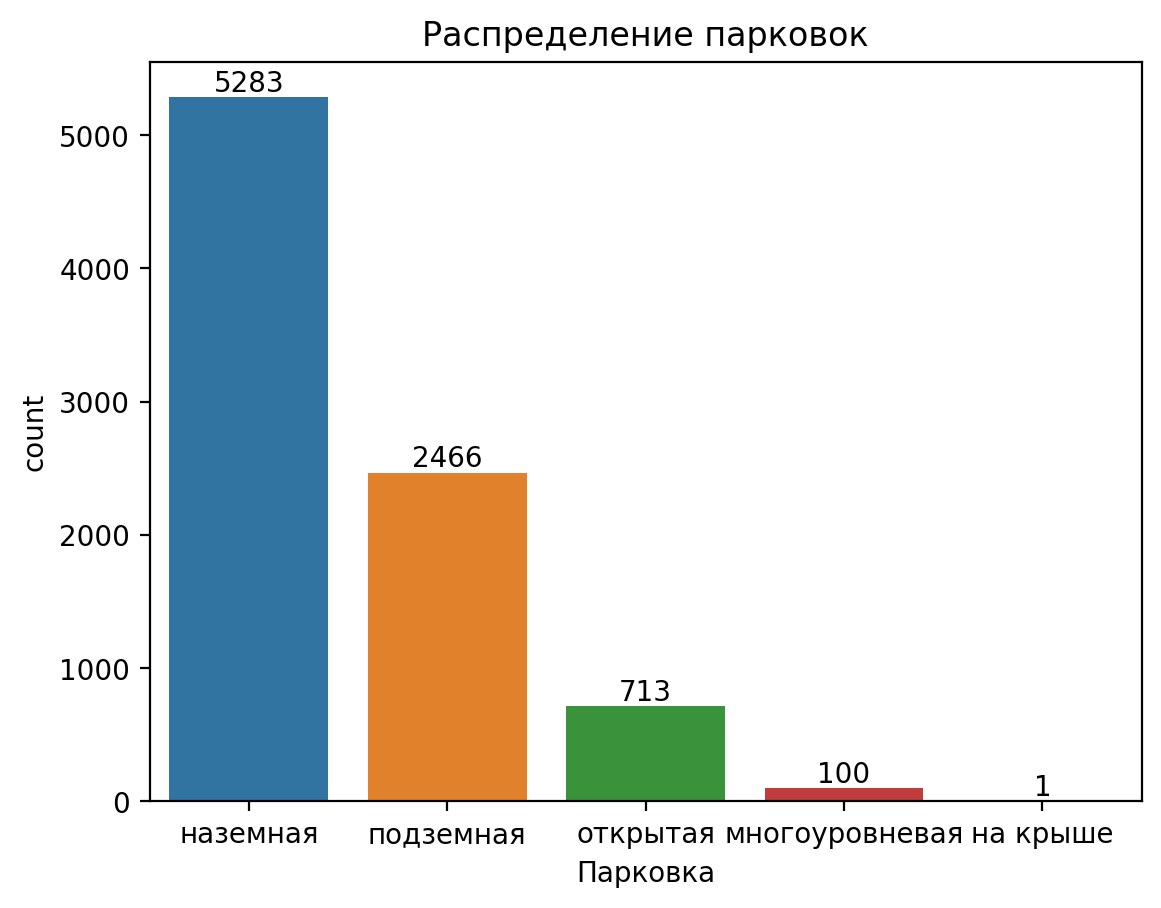

In [629]:
parking = pd.DataFrame(formatted_rlst['Парковка'].value_counts())
#ax=plt.subplots()
ax=sns.barplot(data = parking, x = parking.index, y = 'count')
ax.set(title='Распределение парковок')
ax.bar_label(ax.containers[0])
pass

Здесь мы видим, что парковка на крыше всего одна, так что никаких зависимостей мы тут проследить не сможем, поэтому можем смело удалить это значение

## Цена

Text(0.5, 1.0, 'График колличества предложений на рынке по определенной цене')

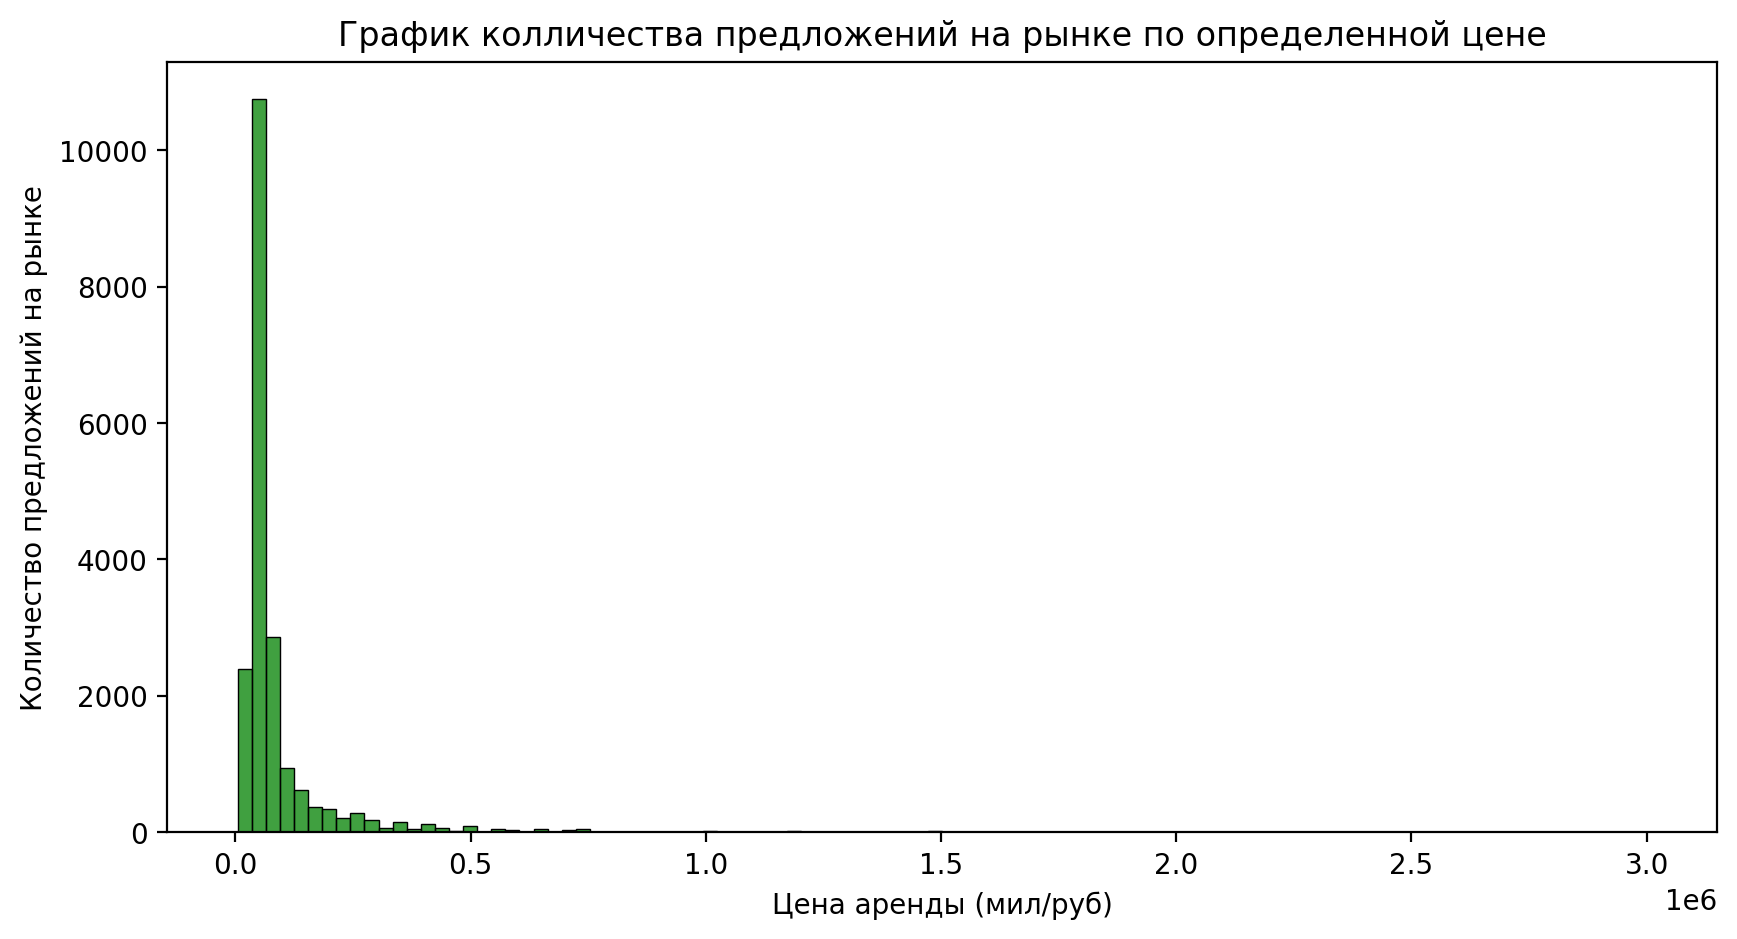

In [630]:

formatted_rlst['Цена аренды'] = formatted_rlst['Цена'].apply(lambda x: float(x.split('.')[0]))

plt.figure(figsize=(10,5))
sns.histplot(x='Цена аренды', data=formatted_rlst, bins=100, color='green')
# new_xticks = [40_000,60_000, 80_000, 100_000, 120_000, 140_000, 160_000, 200_000, 240_000, 280_000]
# new_xticklabels = [40000, 60_000, 80_000, 100_000, 120_000, 140_000, 200_000, 220_000, 260_000, 300_000] 
# plt.xticks(new_xticks, new_xticklabels)
# plt.xticks(rotation=90)  
# new_yticks = [100,300,600,900,1_500, 2_000, 3_000, 4_000]
# plt.yticks(new_yticks)
plt.xlabel('Цена аренды (мил/руб)')
plt.ylabel('Количество предложений на рынке' )
plt.title('График колличества предложений на рынке по определенной цене')

Тут мы видим, что есть несколько объектов с аномально высокой ценой, из-за них у графика не самый комфортный для восприятия масштаб

In [631]:
formatted_rlst['Цена аренды'].describe().apply(lambda x: round(x))
#formatted_rlst['Цена аренды'].sort_values().tail(50)


count      19737
mean       86564
std       128148
min         5000
25%        39990
50%        50000
75%        75000
max      3000000
Name: Цена аренды, dtype: int64

## Площадь

count    19737.000000
mean        63.564848
std         47.944055
min          7.000000
25%         38.900000
50%         49.800000
75%         70.000000
max        811.000000
Name: Общая площадь, dtype: float64

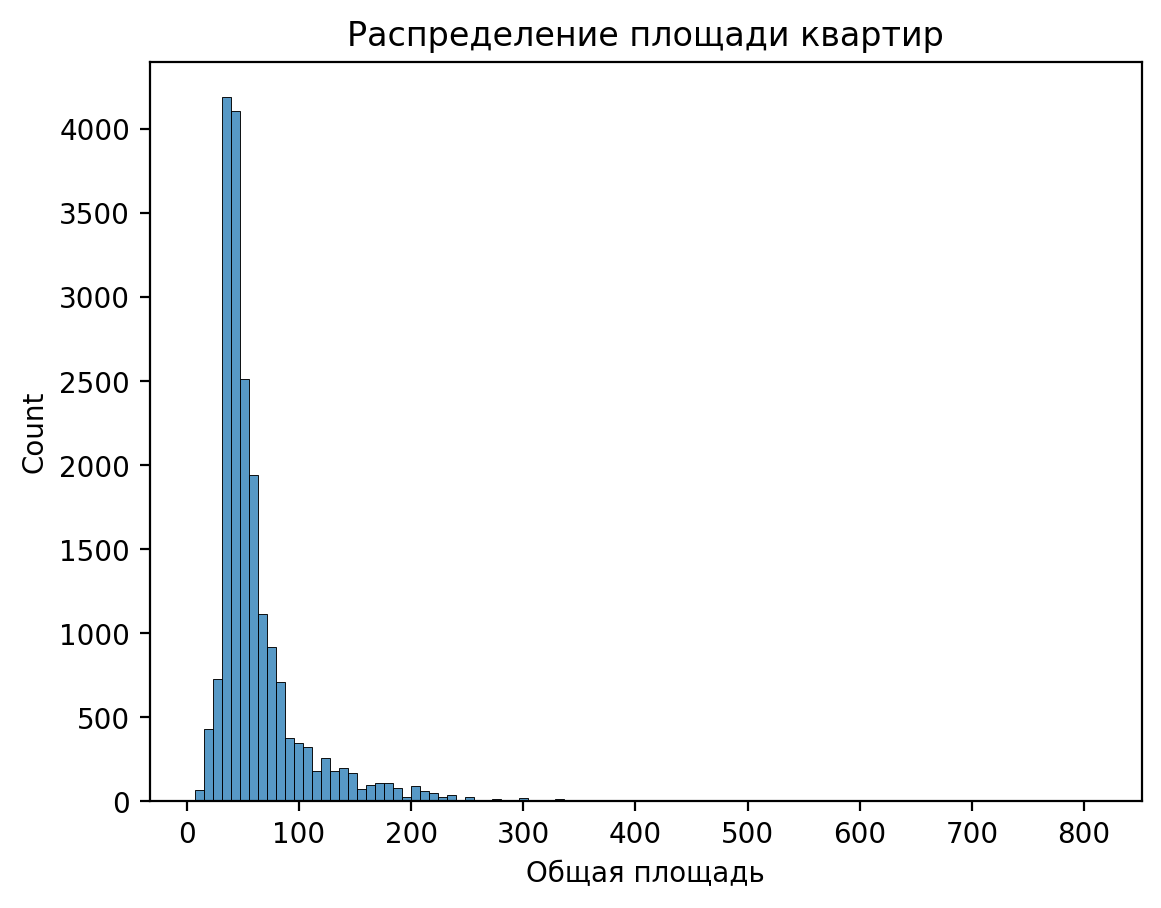

In [632]:
formatted_rlst['Общая площадь'] = formatted_rlst['Площадь, м2'].apply(lambda x: float(x.split('/')[0]))


# Здесь мы используем метод .agg для вычисления нескольких статистических показателей
# из столбца 'Общая площадь' в DataFrame formatted_rlst.
# Мы передаем список строковых значений ['mean', 'min', 'max'] в качестве аргумента метода .agg,
# чтобы вычислить среднее значение, минимальное значение и максимальное значение этого столбца.

#stats = formatted_rlst['Общая площадь'].agg(['mean', 'min', 'max'])

# print("Средняя площадь, м2: ", stats['mean'])
# print("Минимальная площадь, м2: ", stats['min'])
# print("Максимальная площадь, м2: ", stats['max'])
#sns.scatterplot(data=formatted_rlst, x='Цена аренды', y='Общая площадь', hue='Кол-во комнат')
sns.histplot(data=formatted_rlst['Общая площадь'],bins=100).set(title='Распределение площади квартир')
formatted_rlst['Общая площадь'].describe()
#formatted_rlst['Общая площадь'].sort_values().tail(50)

Мы вытащили общую площадь в числовом формате и посмотрели статистические показатели. В Москве могут сдаваться как 7-метровые студии, так и 800-метровые пентхаусы. Вердикт:

**Ничего примечательного**

## Комнаты

count    19202.000000
mean         2.028435
std          1.005077
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: Кол-во комнат, dtype: float64

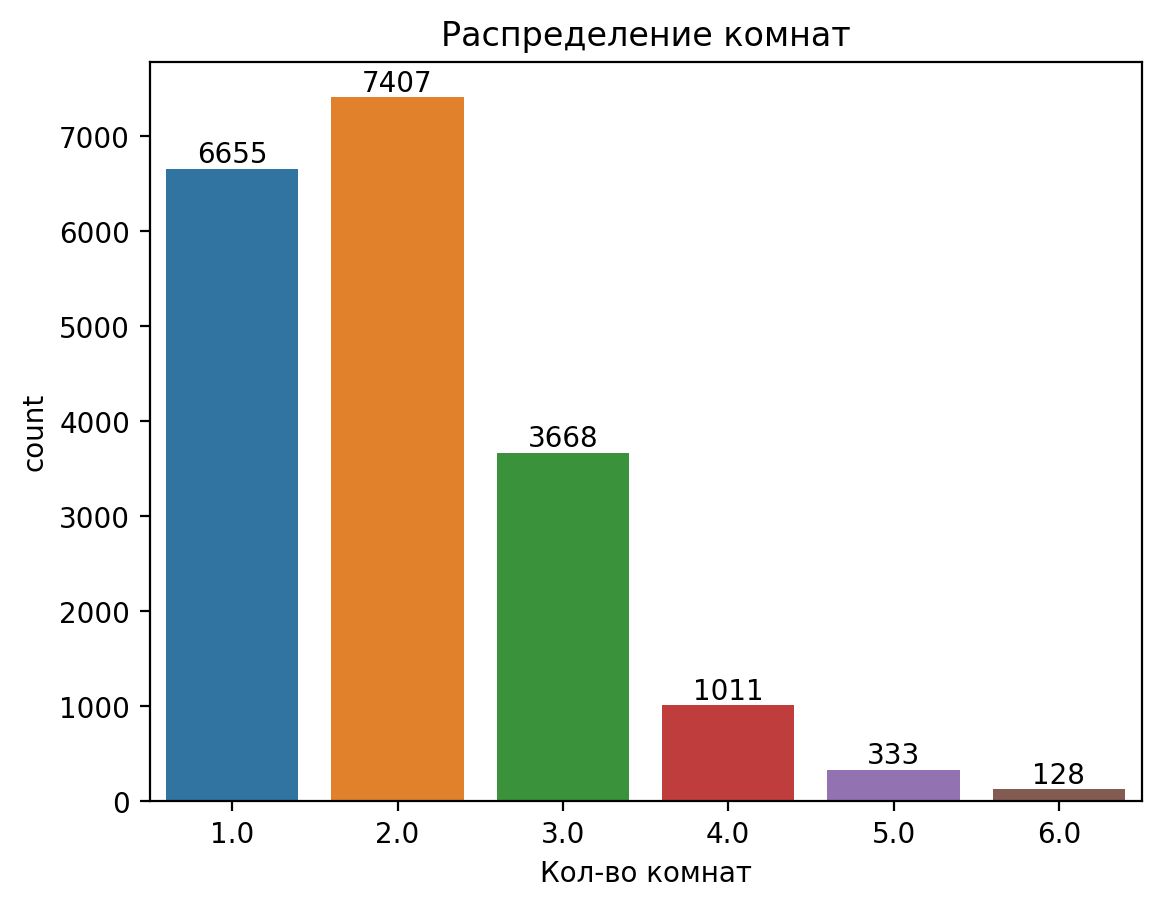

In [633]:
formatted_rlst['Кол-во комнат'] = formatted_rlst.loc[~pd.isna(formatted_rlst['Количество комнат'])]['Количество комнат'].apply(lambda x:float(x.split(',')[0]))
# rooms_rlst = formatted_rlst.groupby('Цена аренды')[['Общая площадь', 'Количество комнат']]
# new_formatted_rlst = formatted_rlst[['Цена аренды','Общая площадь', 'Кол-во комнат']]
# new_formatted_rlst
#sns.scatterplot(data=new_formatted_rlst, x='Цена аренды', y='Общая площадь', hue='Кол-во комнат')
ax=sns.countplot(x=formatted_rlst['Кол-во комнат'])
ax.bar_label(ax.containers[0])
ax.set(title='Распределение комнат')
formatted_rlst['Кол-во комнат'].describe()


Комнат от **1** до **6**. Всё в пределах нормы

**Ничего примечательного**

## Метро

<Axes: xlabel='Метро_мин', ylabel='Count'>

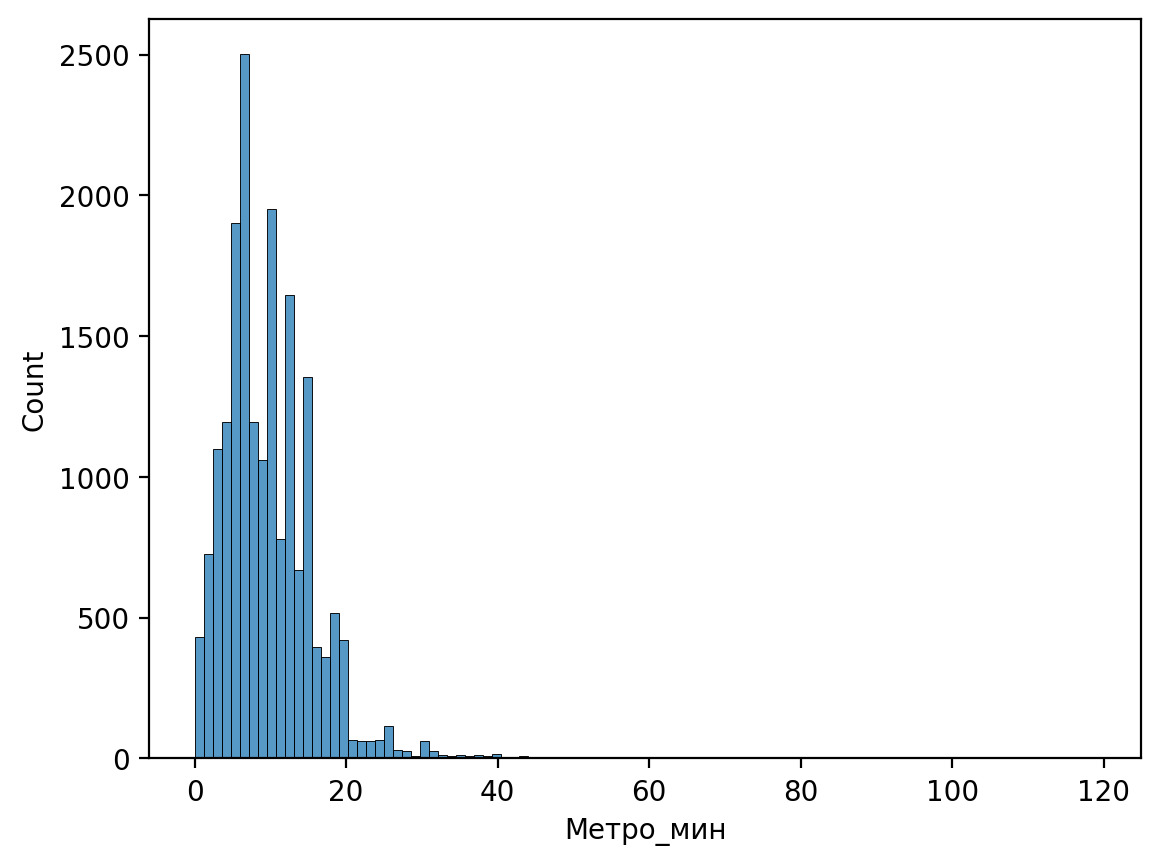

In [634]:
formatted_rlst['Пешком']= formatted_rlst['Метро'].dropna().apply(lambda x: x.find('пешком')!=-1) 
formatted_rlst['Метро_мин']= formatted_rlst['Метро'].dropna().apply(lambda x: x[x.find('(')+1:x.find(' мин')])#.apply(int)
#formatted_rlst['Метро'].dropna().apply(lambda x: int(x[x.find('(')+1:x.find(' мин')]))
formatted_rlst.replace({"None":np.nan},inplace=True)
formatted_rlst['Метро_мин']=formatted_rlst.iloc[:,-1].dropna().astype('int')

#formatted_rlst['Метро мин.'].dropna().loc[formatted_rlst['Метро мин.'].dropna()=='None']
formatted_rlst.iloc[:,-2:].describe(include='all')
sns.histplot(formatted_rlst['Метро_мин'],bins=100)


Тут мы видим нечто похожее на стоимость аренды, так что тут тоже имеет место выброс

## Ремонт

count             17274
unique                4
top       Косметический
freq               7361
Name: Ремонт, dtype: object

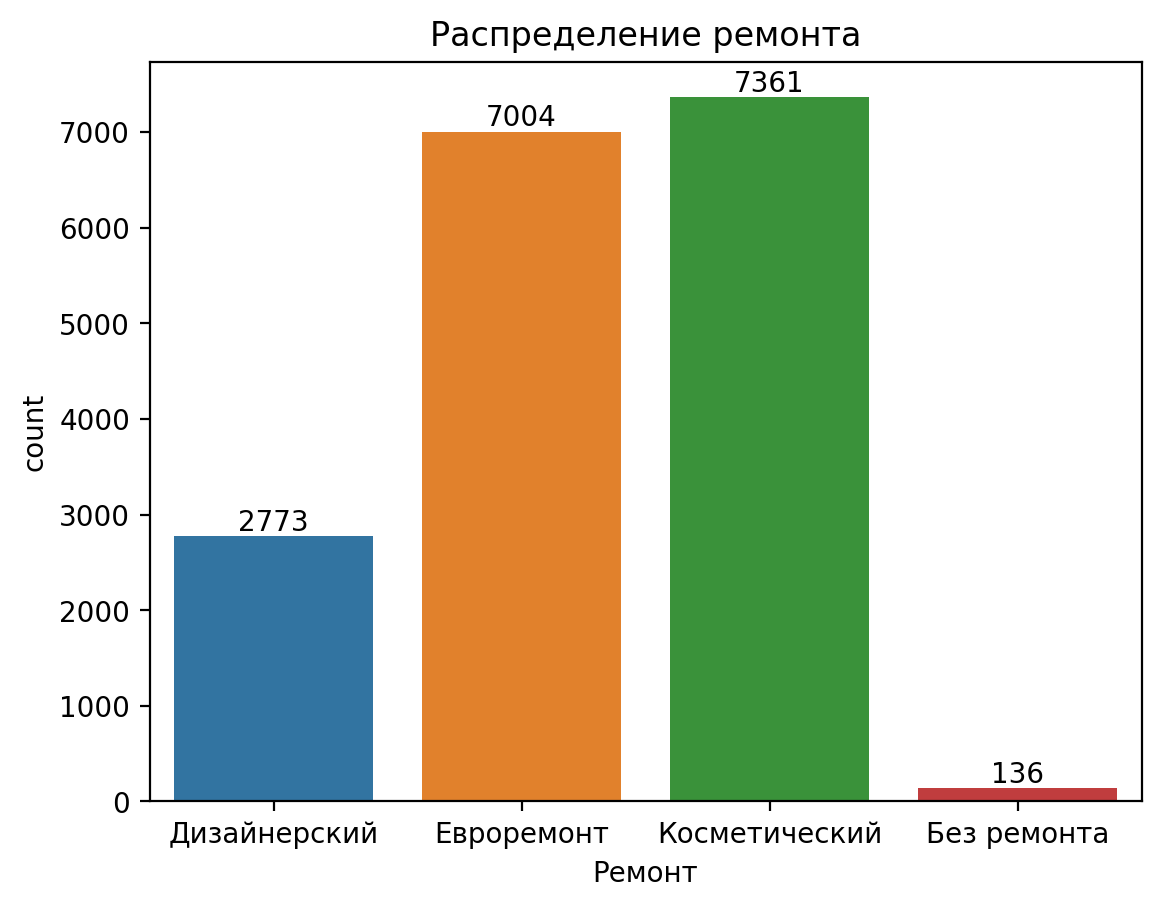

In [635]:
ax=sns.countplot(x=formatted_rlst['Ремонт'])
ax.bar_label(ax.containers[0])
ax.set(title='Распределение ремонта')
formatted_rlst['Ремонт'].describe()

Ничего примечательного

## Дети/животные

count              14822
unique                 3
top       Можно с детьми
freq                8540
Name: Можно с детьми/животными, dtype: object

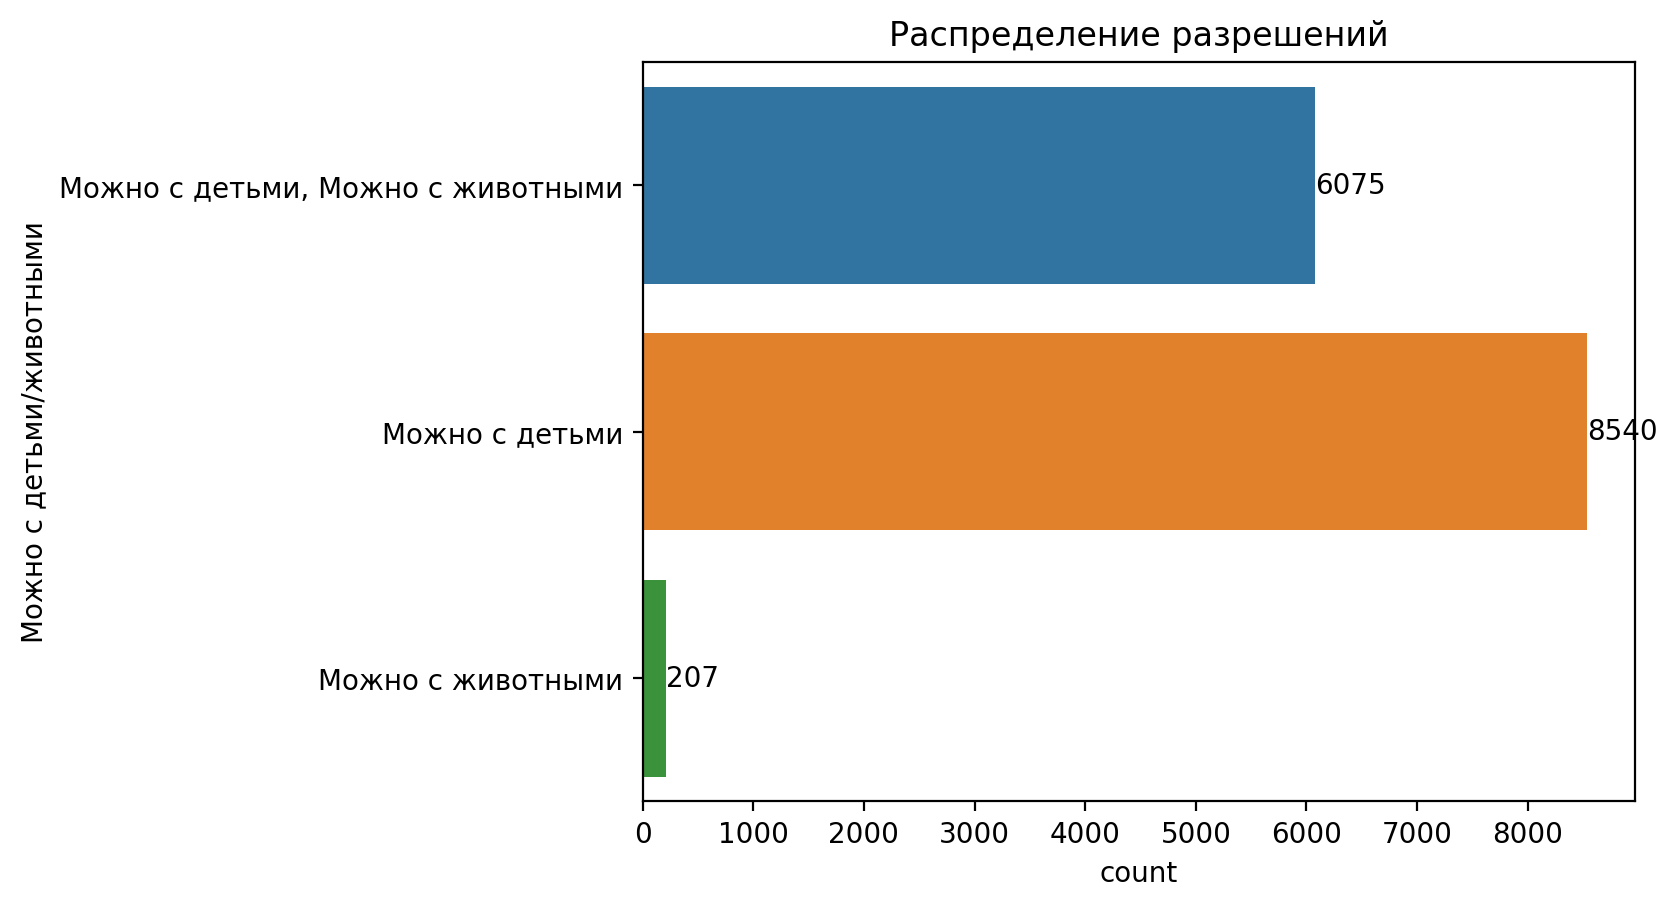

In [636]:
ax=sns.countplot(y=formatted_rlst['Можно с детьми/животными'])
ax.bar_label(ax.containers[0])
ax.set(title='Распределение разрешений')
formatted_rlst['Можно с детьми/животными'].describe()

Примечательно, что один из вариантов подразумевает под собой **конъюнкцию** двух других. Возможно, именно это слово будет ключом к разгадке того, как обрабатывать эти данные

## Окна

count       14587
unique          3
top       Во двор
freq         9708
Name: Окна, dtype: object

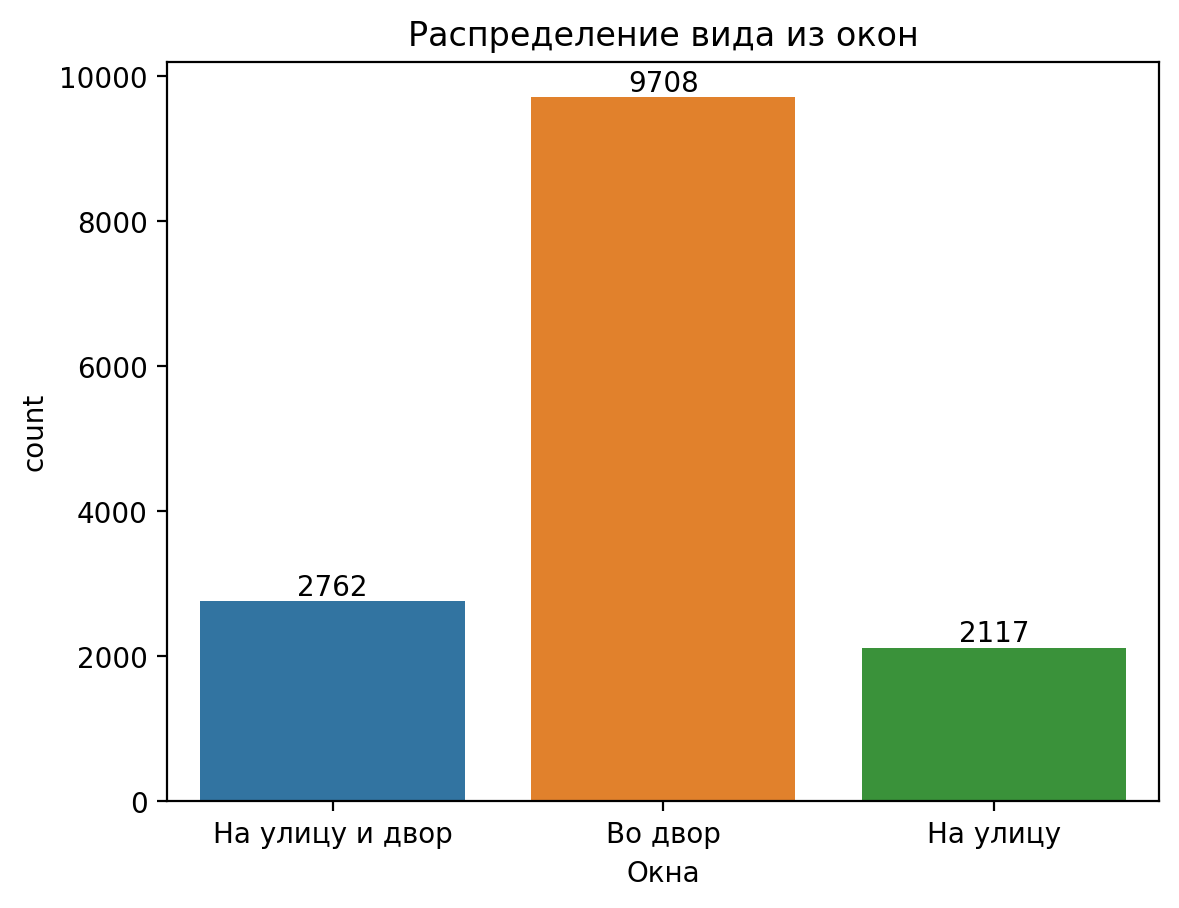

In [637]:
ax=sns.countplot(x=formatted_rlst['Окна'])
ax.bar_label(ax.containers[0])
ax.set(title='Распределение вида из окон')
formatted_rlst['Окна'].describe()


Аналогично предыдущему